# Instructions

1. Add your name below.
2. Complete each question. Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", and delete and `throw NotImplementedError()` lines.
3. Where applicable, run the test cases *below* each question to check your work.
4. Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). You can also use the **Validate** button to run all test cases.
5. Turn in your homework by going to the main screen in JupyterHub, clicking the Assignments menu, and submitting.



In [105]:
"""
Name: Xiaochun Liang
"""

'\nName: Xiaochun Liang\n'

## Import the dataset

In [106]:
import pandas as pd

In [107]:
data = pd.read_csv('/etc/data/employees.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Data Splitting
In this milestone, we will run some experiments to see if we can improve our classifier. It's tempting to run these experiments to see which decisions perform best at classifying the *test* dataset. However, the purpose of a test dataset is to represent future data we haven't seen yet. It wouldn't be very realistic if we were able to test out a bunch of different approaches and choose the best one. If we tried 100 approaches, one might do very well just by chance, but we wouldn't expect that to work again on new unseen data.

Therefore, when running experiments, we always use a separate dataset for evaluation, called a *validation dataset*. This is a stand-in for our test data while we experiment. We make the best choices we can based on this validation dataset, and then once we've made them, we can evaluate our final model on the test data, the first and only time we use it.

**Instructions**: Now split the dataset into a train, *validation* and test sets. You will need two calls to the `train_test_split` function. Aim for the following:
* 20% Test Data
* 20% Validation Data (what percent of the non-test data is this?)
* 60% Training Data (what percent of the non-test data is this?)
* **Note**: You are recommended to use `random_state=1234` for both splits, to ensure a deterministic result in the test cases below; however, these test cases should *not* make assumptions about your exact training and test sets.

Relevant documentation
* [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [108]:
from sklearn.model_selection import train_test_split

X = data.drop(['Attrition'], axis=1)
y = data['Attrition']

X_train = X_test = X_val = None
y_train = y_test = y_val = None

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1234)


In [109]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(882, 34)
(294, 34)
(294, 34)
(882,)
(294,)
(294,)


In [110]:
assert X_train.shape == (882, 34)
assert X_val.shape == X_test.shape == (294, 34)
assert y_train.shape[0] == 882
assert y_val.shape[0] == y_test.shape[0] == 294

## EDA

**Instructions**: To complete the **planning** portion of this milestone, you will need to perform some exploratory data analysis. Do that analysis here.

**Warning**: Make sure your EDA uses only the training dataset!

**Hint**: Click on a cell's header and press 'b' to create a cell below it.

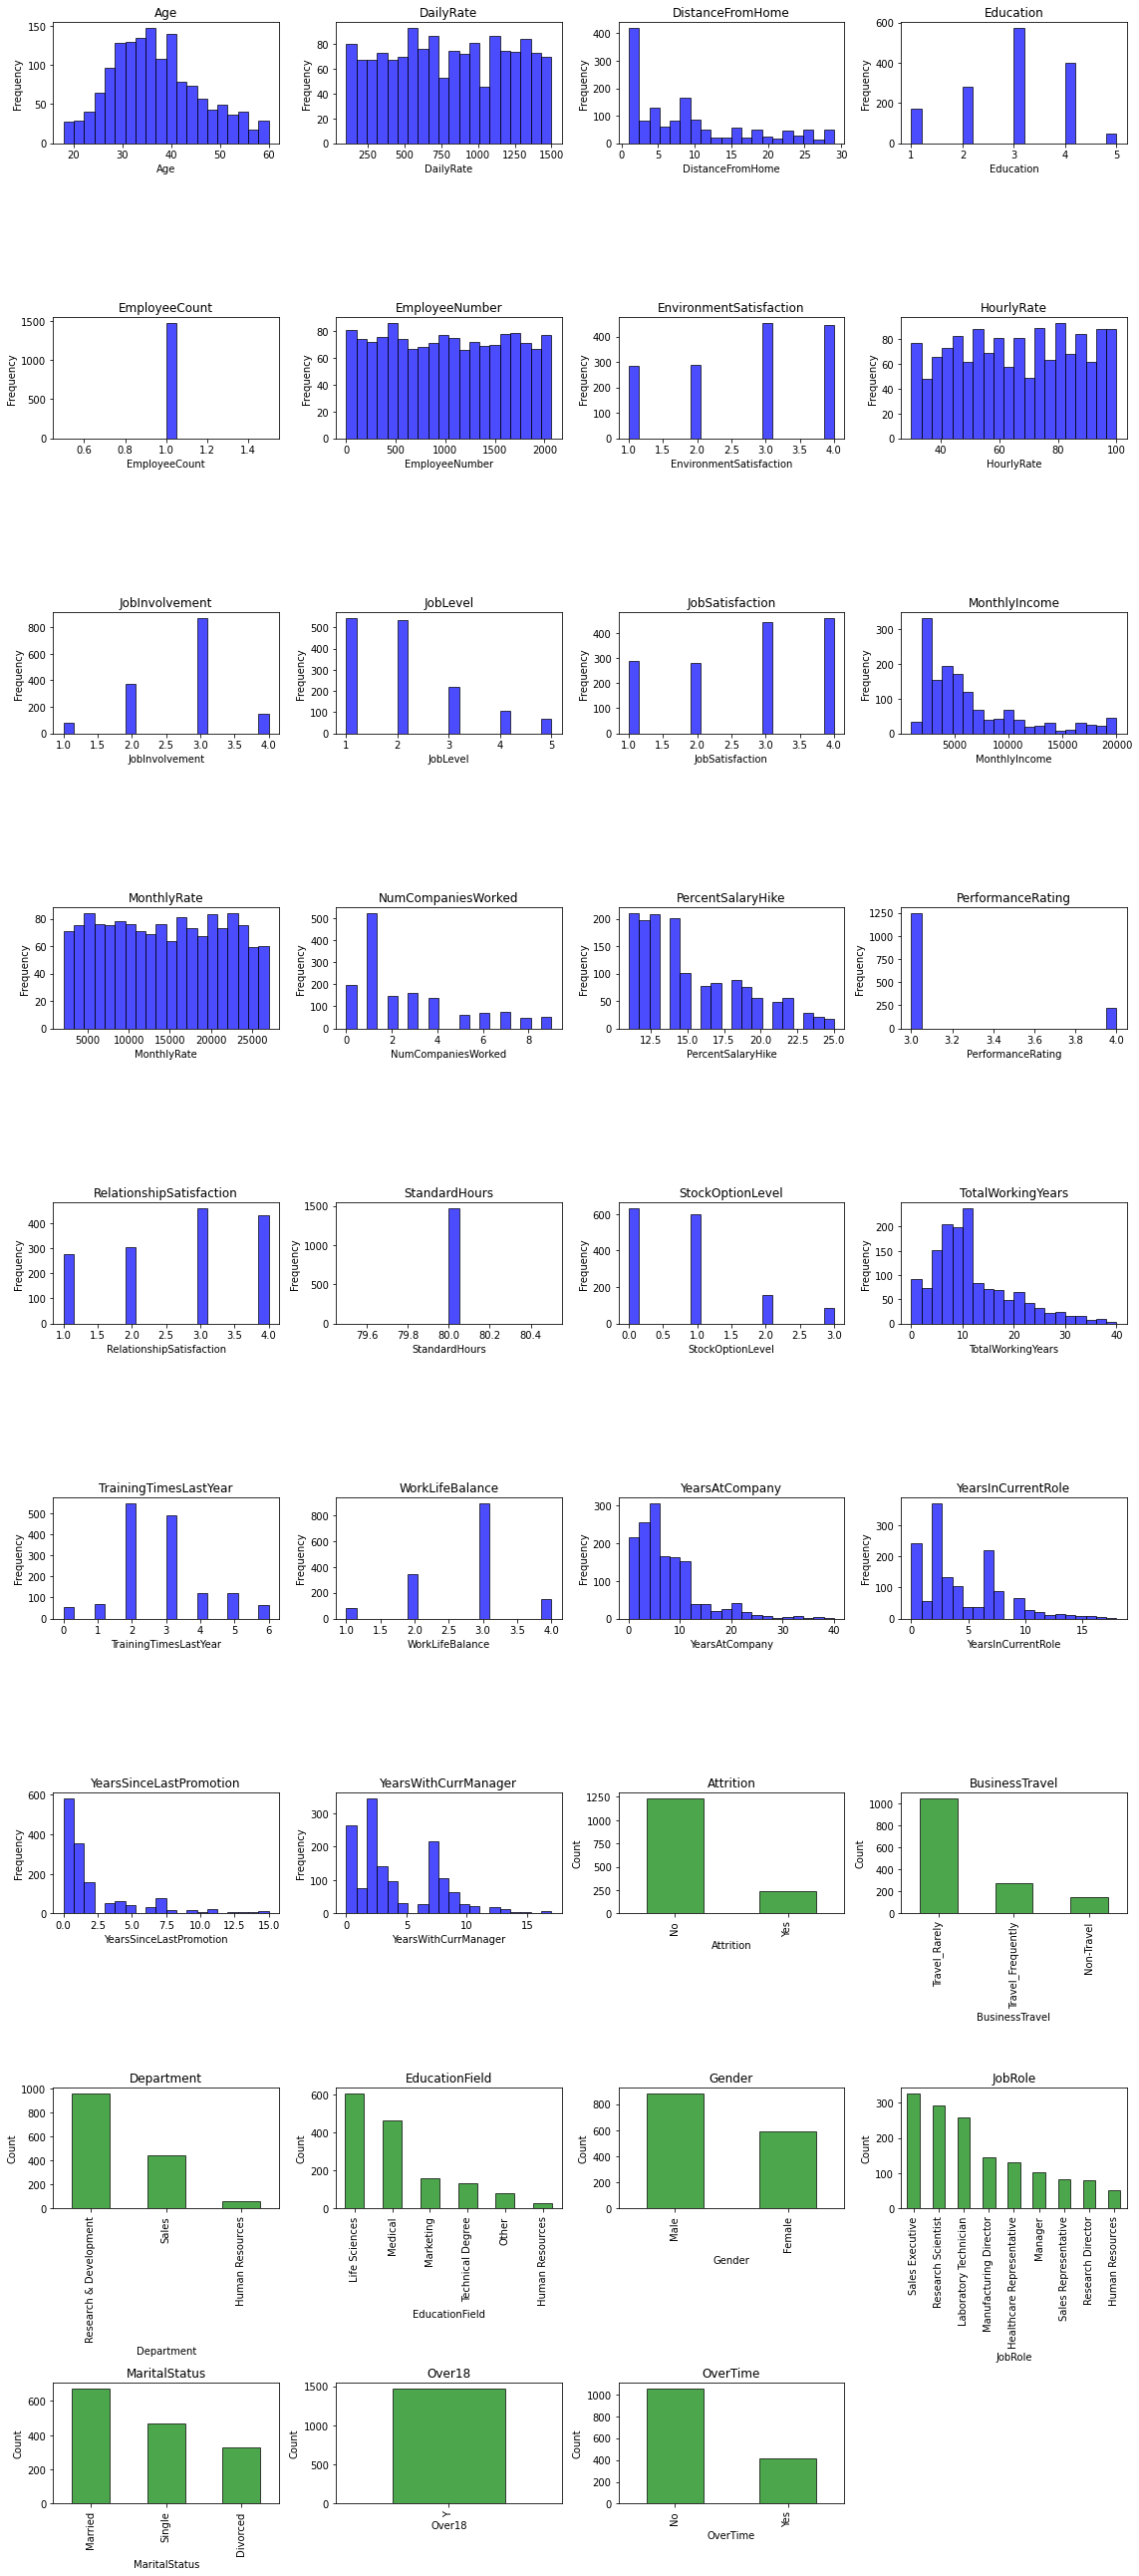

In [111]:
import matplotlib.pyplot as plt
df = data

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Set up the figure with subplots (adjust rows/cols based on dataset)
num_features = len(numerical_cols) + len(categorical_cols)
rows = (num_features // 4) + 1  # Adjust subplot rows dynamically

plt.figure(figsize=(16, rows * 4))

# Plot numerical features using histograms
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 4, i)
    plt.hist(df[col], bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

# Plot categorical features using bar charts
for i, col in enumerate(categorical_cols, len(numerical_cols) + 1):
    plt.subplot(rows, 4, i)
    df[col].value_counts().plot(kind='bar', color='green', edgecolor='black', alpha=0.7)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [112]:
X_train.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

(array([1244.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         226.]),
 array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ]),
 <BarContainer object of 10 artists>)

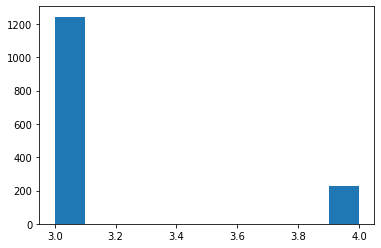

In [113]:
plt.hist(data.PerformanceRating)

(array([   0.,    0.,    0.,    0.,    0., 1470.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

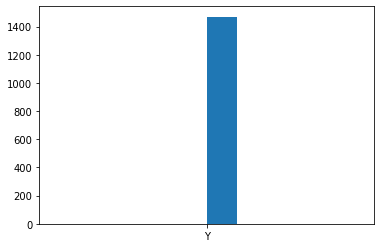

In [114]:
plt.hist(data.Over18)

(array([326., 292., 259., 145.,   0., 131., 102.,  83.,  80.,  52.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

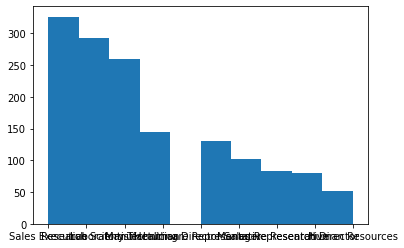

In [115]:
plt.hist(data.JobRole)                 

(array([631.,   0.,   0., 596.,   0.,   0., 158.,   0.,   0.,  85.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

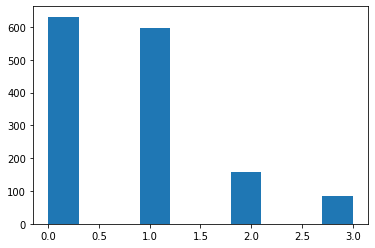

In [116]:
plt.hist(data.StockOptionLevel)

In [117]:
X_train.BusinessTravel.value_counts()

Travel_Rarely        630
Travel_Frequently    160
Non-Travel            92
Name: BusinessTravel, dtype: int64

In [118]:
X_train.Department.value_counts()

Research & Development    580
Sales                     261
Human Resources            41
Name: Department, dtype: int64

In [119]:
X_train.Over18.value_counts()

Y    882
Name: Over18, dtype: int64

In [120]:
X_train.Department.value_counts()

Research & Development    580
Sales                     261
Human Resources            41
Name: Department, dtype: int64

## Evaluation

We can use our evaluation function from the last milestone. But instead of passing in the test dataset, we'll use the validation dataset.

In [121]:
def evaluate_pipelines(pipelines, X_train, y_train, X_evaluate, y_evaluate):
    rows = []
    for name, pipeline in pipelines:
        pipeline.fit(X_train, y_train)
        training_accuracy = pipeline.score(X_train, y_train)
        test_accuracy = pipeline.score(X_evaluate, y_evaluate)
        rows.append({'name': name, 'training_accuracy': training_accuracy, 'eval_accuracy': test_accuracy})
    return pd.DataFrame(rows)

#### A Baseline
Let's start off by recreating our work from the last milestone to act as a baseline model. Hopefully we can improve on it.

This baseline k-NN pipeline removes non-numeric attributes and does no other preprocessing.

**Note**: We are using the *validation* dataset to measure the performance of the model on unseen data! Remember, we don't want to use our test dataset until we are done with our experiments and have discovered the best preprocessing pipeline.

In [122]:
from sklearn.compose import make_column_transformer, make_column_selector
numeric_selector = make_column_selector(dtype_include='number')
numeric_only_transformer = make_column_transformer(('passthrough', numeric_selector))

In [123]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

baseline_knn_pipeline = make_pipeline(numeric_only_transformer, KNeighborsClassifier())

In [124]:
evaluate_pipelines([
    ('Baseline', baseline_knn_pipeline)
], X_train, y_train, X_val, y_val)

,name,training_accuracy,eval_accuracy
0,Baseline,0.854875,0.812925


## Feature Encoding
**Instructions**:
* Make sure you have completed the **planning** portion of the lab before proceeding.
* For each feature in the dataset, categorize it as Nominal, Ordinal or Binary (non-numeric), Irrelevant, or Numeric (the rest)

In [125]:
# TODO: define lists of attribute names for each attribute type
# based on your planning worksheet
nominal_columns = None
ordinal_or_binary_columns = None
irrelevant_columns = None

# YOUR CODE HERE
nominal_columns = ["EducationField", "JobRole", "Department", "MaritalStatus"]
ordinal_or_binary_columns = ["BusinessTravel", "Gender", "OverTime"]
irrelevant_columns = [ "StandardHours", 
                      "EmployeeNumber", "Over18", "EmployeeCount"]


In [126]:
for column in X_train.columns:
    n_values = X_train[column].nunique()
    
    if n_values == 1 or n_values == 882:
        if column not in irrelevant_columns:
            print(f"⚠️ Column '{column}' should be in irrelevant_columns but is missing.")
            raise AssertionError(f"Make sure you've found all irrelevant columns: {column}")
    
    elif X_train[column].dtype == 'object':  # Checking categorical columns
        if n_values == 2:  # Binary attributes
            if column not in ordinal_or_binary_columns:
                print(f"⚠️ Column '{column}' is binary but missing from ordinal_or_binary_columns.")
                raise AssertionError(f"Make sure to check for binary attributes: {column}")
        else:  # Nominal or ordinal attributes
            if column not in (nominal_columns + ordinal_or_binary_columns):
                print(f"⚠️ Column '{column}' is categorical but not listed in nominal_columns or ordinal_or_binary_columns.")
                raise AssertionError(f"Make sure to check for all non-numeric attributes: {column}")
    
    else:  # Numeric columns
        if column in (nominal_columns + ordinal_or_binary_columns):
            print(f"⚠️ Column '{column}' is numeric but wrongly included in nominal or ordinal lists.")
            raise AssertionError(f"Numeric columns shouldn't be included (even if they're technically ordinal, they don't need encoding): {column}")


In [127]:
for column in X_train.columns:
    n_values = X_train[column].nunique()
    if n_values == 1 or n_values == 882:
        assert column in irrelevant_columns, f"Make sure you've found all irrelevant columns: {column}"
    elif X_train[column].dtype == 'object':
        if n_values == 2:
            assert column in ordinal_or_binary_columns, f"Make sure to check for binary attributes: {column}"
        else:
            assert column in (nominal_columns + ordinal_or_binary_columns), f"Make sure to check for all non-numeric attributes: {column}"
    else:
        assert column not in (nominal_columns + ordinal_or_binary_columns), "Numeric columns shouldn't be included (even if they're technically ordinal, they don't need encoding)"

**Instructions**:
* Create an appropriate encoder for the nominal attributes.

Relevant Documentation (you'll only need one):
* [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
* [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html): Pay attention to the `categories` parameter.

In [1]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

nominal_encoder = None

# YOUR CODE HERE

nominal_encoder = OneHotEncoder()

Let's compare the unencoded and encoded versions of `EducationField`:

In [129]:
print(X[['EducationField']].head())

  EducationField
0  Life Sciences
1  Life Sciences
2          Other
3  Life Sciences
4        Medical


In [130]:
print(nominal_encoder.fit_transform(X[['EducationField']].head()).toarray())

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [131]:
assert nominal_encoder.fit_transform(X_train[['EducationField']].head(5)).shape == (5, 3)

**Instructions**:
* Create an appropriate encoder for the ordinal/binary attributes.
* Define the correct order for those attribute values.

Relevant Documentation (you'll only need one):
* [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
* [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html): Pay attention to the `categories` parameter.

In [132]:


ordinal_encoder = None

# YOUR CODE HERE
correct_order = [['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'],['Female','Male'],['Yes','No']]
ordinal_encoder = OrdinalEncoder(categories=correct_order)

Now let's compare the encoded and unencoded versions of the ordinal and binary columns.

In [133]:
X[ordinal_or_binary_columns].head()

,BusinessTravel,Gender,OverTime
0,Travel_Rarely,Female,Yes
1,Travel_Frequently,Male,No
2,Travel_Rarely,Male,Yes
3,Travel_Frequently,Female,Yes
4,Travel_Rarely,Male,No


In [134]:
ordinal_encoder.fit_transform(X[ordinal_or_binary_columns].head())

array([[1., 0., 0.],
       [2., 1., 1.],
       [1., 1., 0.],
       [2., 0., 0.],
       [1., 1., 1.]])

In [135]:
X_train[ordinal_or_binary_columns].head()

,BusinessTravel,Gender,OverTime
946,Travel_Rarely,Male,Yes
239,Travel_Rarely,Male,Yes
1166,Travel_Frequently,Male,No
684,Travel_Rarely,Male,No
552,Travel_Rarely,Male,No


In [136]:
ordinal_encoder.fit_transform(X_train[ordinal_or_binary_columns].head())

array([[1., 1., 0.],
       [1., 1., 0.],
       [2., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [137]:
X_train[X_train.BusinessTravel == 'Travel_Frequently'][ordinal_or_binary_columns]

,BusinessTravel,Gender,OverTime
1166,Travel_Frequently,Male,No
1159,Travel_Frequently,Female,No
614,Travel_Frequently,Female,Yes
56,Travel_Frequently,Male,No
1128,Travel_Frequently,Male,Yes
...,...,...,...
292,Travel_Frequently,Female,No
479,Travel_Frequently,Female,Yes
1057,Travel_Frequently,Female,No
111,Travel_Frequently,Male,Yes


In [138]:
X_train[X_train.BusinessTravel == 'Non-Travel'][ordinal_or_binary_columns].head()

,BusinessTravel,Gender,OverTime
442,Non-Travel,Male,No
261,Non-Travel,Male,No
1022,Non-Travel,Male,No
774,Non-Travel,Male,No
112,Non-Travel,Female,Yes


In [139]:
ordinal_encoder.fit_transform(X_train[X_train.BusinessTravel == 'Non-Travel'][ordinal_or_binary_columns].head())

array([[0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [0., 0., 0.]])

In [140]:
X_train.BusinessTravel.value_counts()

Travel_Rarely        630
Travel_Frequently    160
Non-Travel            92
Name: BusinessTravel, dtype: int64

In [141]:
assert ordinal_encoder.fit_transform(X_train[ordinal_or_binary_columns].head()).shape == (5, 3)

assert (ordinal_encoder.fit_transform(X_train[X_train.BusinessTravel == 'Travel_Frequently'][ordinal_or_binary_columns]) == 2).mean() > 0, 'Make sure you have encoded your ordinal attribute in the correct order'
assert (ordinal_encoder.fit_transform(X_train[X_train.BusinessTravel == 'Non-Travel'][ordinal_or_binary_columns]) == 0).mean() > 0.5, 'Make sure you have encoded your ordinal attribute in the correct order'
assert (ordinal_encoder.fit_transform(X_train[X_train.BusinessTravel == 'Travel_Rarely'][ordinal_or_binary_columns]) == 1).mean() > 0.5, 'Make sure you have encoded your ordinal attribute in the correct order'

**Instructions**: Now we want to create a column transformer that:
* Transforms the nominal columns with the apppropriate encoder
* Transforms the ordinal/binary columns with the appropriate encoder
* Drops the irrelevant columns
* Keeps, or 'passthrough', the remaining numeric columns

Relevant documentation:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html): Pay attention to the `remainder` parameter, and the possible values for the `transformers` parameter's `transformer` entry.

In [142]:
from sklearn.compose import make_column_transformer

# TODO: Create the feature encoder
feature_encoder = None

# YOUR CODE HERE
feature_encoder = make_column_transformer(
    ("drop", irrelevant_columns),
    (nominal_encoder, nominal_columns),
    (ordinal_encoder, ordinal_or_binary_columns),remainder="passthrough")



In [143]:
feature_encoder.fit_transform(X_train).shape

(882, 47)

In [144]:
assert feature_encoder.fit_transform(X_train).shape == (882, 47)

**Instructions**: Now create a pipeline that:
* Encodes your features using your feature_encoder
* Runs a k-NN model with default parameters

Then compare your pipeline to the `baseline_knn_pipeline` we created earlier:
* Use the training dataset for training
* Use the **validation** dataset for inference and evaluation

Use the `evaluate_pipelines` function we defined earlier. Look at the function and how it's used at the top of this notebook.

In [145]:
# TODO: Define the encoded k-NN pipeline
encoded_knn_pipeline = None

# TODO: Evaluate the baseline_knn_pipeline against the encoded_knn_pipeline

# YOUR CODE HERE
encoded_knn_pipeline = make_pipeline(feature_encoder, KNeighborsClassifier())

In [146]:
assert encoded_knn_pipeline.steps[0][1] == feature_encoder, "Make sure you are using your feature_encoder first"
assert isinstance(encoded_knn_pipeline.steps[1][1], KNeighborsClassifier), "Make sure you are using a k-NN classifier second"

## Feature Transformation: Stardardization

Standardization is a critical preprocessing steps for most learning algorithms, especially k-NN. Let's add that to our pipeline and see how it affects performance.


**Instructions**: 
* Create a min/max normalizer with default parameters.
* Create a pipeline that includes encoding, scaling and a k-NN classifier with default parameters.

Relevant documentation:
* [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [147]:
from sklearn.preprocessing import MinMaxScaler

# TODO: Create the scale (don't forget your imports)
scaler = None

# TODO: Create the encode/scale/knn pipeline
standardized_knn_pipeline = None

# TODO: Evaluate the pipeline

# YOUR CODE HERE
scaler = MinMaxScaler()

standardized_knn_pipeline = make_pipeline(feature_encoder,scaler, KNeighborsClassifier())

Let's compare the Age and DailyRate attributes before and after scaling.

In [148]:
X_train[['Age', 'DailyRate']].head()

,Age,DailyRate
946,40,299
239,32,515
1166,48,365
684,40,658
552,56,832


In [149]:
scaler.fit_transform(X_train[['Age', 'DailyRate']].head())

array([[0.33333333, 0.        ],
       [0.        , 0.40525328],
       [0.66666667, 0.12382739],
       [0.33333333, 0.67354597],
       [1.        , 1.        ]])

In [150]:
assert standardized_knn_pipeline.steps[0][1] == feature_encoder, "Remember encoding comes before scaling"
assert isinstance(standardized_knn_pipeline.steps[1][1], MinMaxScaler), "Remember to scale second in the pipeline"
assert isinstance(standardized_knn_pipeline.steps[2][1], KNeighborsClassifier), "Make sure you are using a k-NN classifier last"

**Instructions**:
* Evaluate the new `standardized_knn_pipeline` pipeline against the `baseline_knn_pipeline` and `encoded_knn_pipeline` using the `evaluate_pipelines` function.
* Continue to use the training data for training and validation data for inference and evaluation.

In [151]:
#TODO: Evaluate the 3 pipelines
# YOUR CODE HERE
evaluate_pipelines([
    ('Baseline', baseline_knn_pipeline),
    ('standardized_knn_pipeline', standardized_knn_pipeline),
    ('encoded_knn_pipeline', encoded_knn_pipeline)
], X_train, y_train, X_val, y_val)

,name,training_accuracy,eval_accuracy
0,Baseline,0.854875,0.812925
1,standardized_knn_pipeline,0.877551,0.853741
2,encoded_knn_pipeline,0.852608,0.823129


## Feature Selection

We may have some redundant or unhelpful features in our dataset. Feature selection can improve our k-NN model's performance by removing the features, allowing the distance measure to only focus on meaningful features.

Let's start by identifying just the numeric features, and dropping our irrelevant columns. While feature selection can operate over encoded categorical features, it's harder to make sense of these results, since one feature may become multiple features.

In [152]:
X_train_numeric = X_train.drop(irrelevant_columns, axis=1).select_dtypes('number')
X_train_numeric.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
946,40,299,25,4,4,57,2,3,2,9094,...,3,3,0,9,2,3,5,4,1,0
239,32,515,1,3,4,62,2,1,3,3730,...,3,4,0,4,2,1,3,2,1,2
1166,48,365,4,5,3,89,2,4,4,15202,...,4,2,1,23,3,3,2,2,2,2
684,40,658,10,4,1,67,2,3,2,9705,...,3,2,1,11,2,2,1,0,0,0
552,56,832,9,3,3,81,3,4,4,11103,...,3,3,0,30,1,2,10,7,1,1



Next, we can plot a heatmap of the correlations between features. Which features are most correlated?

<AxesSubplot:>

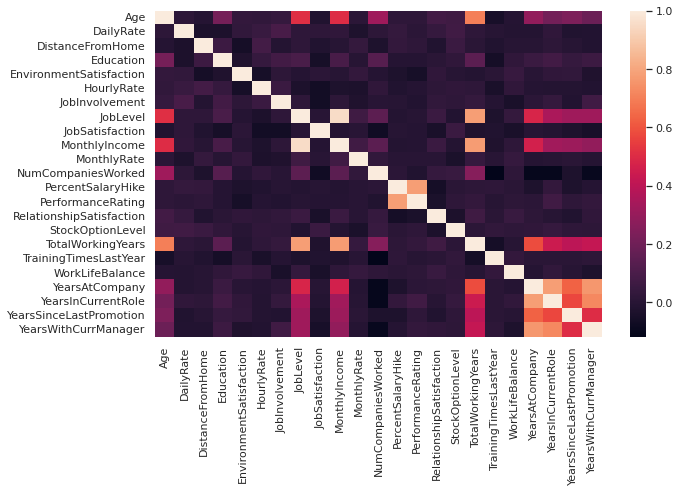

In [153]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 6)})
sns.heatmap(X_train_numeric.corr())

**Instructions**:
* Create a `SelectKBest` feature selector. This will select the features that are most predictive of our label using some `score_func`.
* Use the `f_classif` function as a `score_func`. This function computes the ANOVA f-value for the relationship between each feature and the class label, essentially measuring how predictive one is of the other.
* Have the SelectKBest select the top 5 features. Why 15? It's a bit arbitrary for now. We'll learn how to make a more informed choice later.

Relevant documentation:
* [`SelectKBest`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html): Pay attention to the `k` parameter.
* [`f_classif`](https://scikit-learn.org/dev/modules/generated/sklearn.feature_selection.f_classif.html)

In [157]:
# YOUR CODE HERE
from sklearn.feature_selection import SelectKBest, f_classif
k_best_selector = SelectKBest(f_classif, k=5)


The following code reveals the top-k features that were selected.

In [158]:
k_best_selector.fit_transform(X_train_numeric, y_train)
k_best_selector.feature_names_in_[k_best_selector.get_support()]

array(['JobInvolvement', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears',
       'YearsWithCurrManager'], dtype=object)

In [159]:
assert k_best_selector.fit_transform(X_train_numeric, y_train).shape[1] == 5, "Make sure you are selecting the top-5 attributes"

**Instructions**:
* Create a Recursive Feature Elimination (`RFE`) feature selector. This will select the features that are most useful for predicting the class label when used in another classifier.
* Create a DecisionTreeClassifier with `random_state=1234` and use it as your `estimator` for RFE.
* Have the RFE select the top 5 features.

Relevant documentation:
* [`RFE`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html): Pay attention to the `n_features_to_select` parameter.
* [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [162]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
# TODO: Define the RFE
# Don't forget imports!
rfe_selector = None

# YOUR CODE HERE
rfe_selector = RFE(DecisionTreeClassifier(random_state=1234),n_features_to_select=5, step=1)

The following code reveals the top-k features that were selected.

In [163]:
rfe_selector.fit_transform(X_train_numeric, y_train)
rfe_selector.feature_names_in_[rfe_selector.get_support()]

array(['DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate',
       'TotalWorkingYears'], dtype=object)

In [164]:
assert rfe_selector.fit_transform(X_train_numeric, y_train).shape[1] == 5, "Make sure you are selecting the top-5 attributes"

**Instructions**: Create two new pipelines:
1. Encode + Normalize + KBestSelector + k-NN
2. Encode + Normalize + RFE + k-NN

In [165]:
# TODO: Create the first pipeline
scaled_with_kbest_pipeline = None

# TODO: Create the second pipeline
scaled_with_rfe_pipeline = None

# YOUR CODE HERE
scaled_with_kbest_pipeline = make_pipeline(feature_encoder,scaler,k_best_selector, KNeighborsClassifier())


scaled_with_rfe_pipeline = make_pipeline(feature_encoder,scaler,rfe_selector, KNeighborsClassifier())

In [168]:
assert len(scaled_with_kbest_pipeline.steps) == 4, "Make sure you have all 4 steps"
assert len(scaled_with_rfe_pipeline.steps) == 4, "Make sure you have all 4 steps"
assert scaled_with_kbest_pipeline.steps[2][1] == k_best_selector, "Do feature selection after encoding and scaling!"
assert scaled_with_rfe_pipeline.steps[2][1] == rfe_selector, "Do feature selection after encoding and scaling!"

**Instructions**:
* Now evaluate all 5 pipelines you have created using the `evaluate_pipelines` function.
* Continue to use the training data for training and validation data for inference and evaluation.

In [170]:
#TODO: Evaluate the 5 pipelines
# YOUR CODE HERE
evaluate_pipelines([
    ('Baseline', baseline_knn_pipeline),
    ('standardized_knn_pipeline', standardized_knn_pipeline),
    ('encoded_knn_pipeline', encoded_knn_pipeline),
    ('scaled_with_kbest_pipeline', scaled_with_kbest_pipeline),
    ('scaled_with_rfe_pipeline', scaled_with_rfe_pipeline)
], X_train, y_train, X_val, y_val)

,name,training_accuracy,eval_accuracy
0,Baseline,0.854875,0.812925
1,standardized_knn_pipeline,0.877551,0.853741
2,encoded_knn_pipeline,0.852608,0.823129
3,scaled_with_kbest_pipeline,0.869615,0.846939
4,scaled_with_rfe_pipeline,0.849206,0.819728


## Final Evaluation
Now we choose the best-performing pipeline from our tests with the validation dataset, and we evaluate it using the test dataset!

In [171]:
best_performing_model = standardized_knn_pipeline

# YOUR CODE HERE

evaluate_pipelines([
    ('Baseline', baseline_knn_pipeline),
    ('Best', best_performing_model)
], X_train, y_train, X_test, y_test)

,name,training_accuracy,eval_accuracy
0,Baseline,0.854875,0.819728
1,Best,0.877551,0.816327


It probably did not perform as well on the test dataset as it did on the validation dataset.

Let's pull back the curtain. Did our validation dataset accurately represent how well each model would do on the *test* dataset?

In [172]:
evaluate_pipelines([
    ('Baseline', baseline_knn_pipeline),
    ('+ Encoded Features', encoded_knn_pipeline),
    ('+ Standardized Features', standardized_knn_pipeline),
    ('+ KBest', scaled_with_kbest_pipeline),
    ('+ RFE', scaled_with_rfe_pipeline)
], X_train, y_train, X_test, y_test)

,name,training_accuracy,eval_accuracy
0,Baseline,0.854875,0.819728
1,+ Encoded Features,0.852608,0.806122
2,+ Standardized Features,0.877551,0.816327
3,+ KBest,0.869615,0.874150
4,+ RFE,0.849206,0.840136


**Remember**: Make sure to complete all problems (.ipynb files) in this assignment. When you finish, double-check the submission instructions at the top of this file, and submit on JupyterHub.